# Read in data

In [1]:
import pandas as pd

dataset = pd.read_csv('../Data/SMSSpamCollection.tsv', sep='\t', names=['label', 'message'])
dataset.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Create feature for message length

In [2]:
dataset['message_length'] = dataset['message'].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,label,message,message_length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


# Create feature for percentage of text that is punctuation

In [4]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

dataset['punct%'] = dataset['message'].apply(lambda x: count_punct(x))

dataset.head()

,label,message,message_length,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


# Visualize created features

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

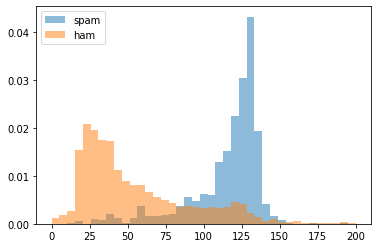

In [8]:
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset[dataset['label']=='spam']['message_length'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(dataset[dataset['label']=='ham']['message_length'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

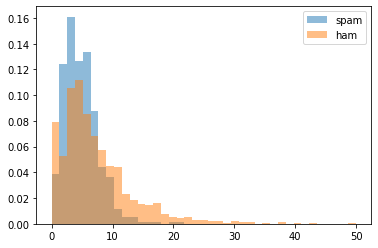

In [9]:
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset[dataset['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(dataset[dataset['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()